In [1]:
# [3] Import all the necessary packages (Pandas and NumPy):
import pandas as pd
import numpy as np

# [4] Read the provided CSV file/data set.
df = pd.read_csv("Customer_data.csv") 

# [5] Print the table.
df.head() 

Age   Occupation   Status                Edu House Loan      Comm Month  \
0   44  blue-collar  married           basic.4y   yes   no  cellular   aug   
1   53   technician  married            unknown    no   no  cellular   nov   
2   28   management   single  university.degree   yes   no  cellular   jun   
3   39     services  married        high.school    no   no  cellular   apr   
4   55      retired  married           basic.4y   yes   no  cellular   aug   

   DOW  Duration  Campaign  PosDays     Last_out  Var_rate  Price_idx  \
0  thu       210         1      999  nonexistent       1.4     93.444   
1  fri       138         1      999  nonexistent      -0.1     93.200   
2  thu       339         3        6      success      -1.7     94.055   
3  fri       185         2      999  nonexistent      -1.8     93.075   
4  fri       137         1        3      success      -2.9     92.201   

   Conf_idx  Month_rate  Quarterly_emp  Target  
0     -36.1       4.963         5228.1       0  
1     -42.0       4.021         5195.8       0  
2     -39.8       0.729         4991.6       1  
3     -47.1       1.405         5099.1       0  
4     -31.4       0.869         5076.2       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

In [8]:
df.shape

(41188, 19)

The education column contains strings. we need to convert these strings into single words

In [6]:
# [1] Specify the DataFrame column & [2] Add/determine the values.
df['Edu'].value_counts() 

pre-school      12513
uni             12168
high-school      9515
professional     5243
other            1749
Name: Edu, dtype: int64

In [5]:
# [1] Specify the DataFrame and column name,
# [2] Specify the DataFrame and the column name that contains 
# the string to be changed 
# [3] Specify the word to be changed that the string contains 
# and the new name:

df.loc[df['Edu'].str.contains('basic'), 'Edu'] = 'pre-school'
df.loc[df['Edu'].str.contains('university'), 'Edu'] = 'uni'
df.loc[df['Edu'].str.contains('high'), 'Edu'] = 'high-school'
df.loc[df['Edu'].str.contains('professional'), 'Edu'] = 'professional'
df.loc[df['Edu'].str.contains('unknown'), 'Edu'] = 'other'
df.loc[df['Edu'].str.contains('illiterate'), 'Edu'] = 'other'

df['Edu'].unique

array(['pre-school', 'other', 'uni', 'high-school', 'professional'],
      dtype=object)

In [11]:
df['Occupation'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: Occupation, dtype: int64

Create dummy variables for the categorical variables and use these to replace the old values. This can be done using one hot coding but creating a features variable that contains all of the columns is much easier

In [12]:
df.columns

Index(['Age', 'Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month',
       'DOW', 'Duration', 'Campaign', 'PosDays', 'Last_out', 'Var_rate',
       'Price_idx', 'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target'],
      dtype='object')

In [13]:
features = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month',
       'DOW', 'Last_out']

In [14]:
new_df = pd.get_dummies(df, columns = features)

In [16]:
new_df.shape

(41188, 57)

Now we need to check if the data in the target column is balanced or not and if its noe then we will balance it

In [22]:
df['Target'].value_counts()

0    36548
1     4640
Name: Target, dtype: int64

In [89]:
# [1] Import all the necessary packages:
# [1a] Assists with providing classes and functions 
# to estimate many different statistical methods.
import statsmodels.api as sm   
import imblearn
# [1b] Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# [1c] Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings("ignore")

# create a final df with all nulls filled with 0
df_final = new_df.fillna(0)

# Set the variables:
X = df_final.loc[:, df_final.columns !='Target']
y = df_final.loc[:, df_final.columns == 'Target']

# Apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)

# test/train split
x_test, x_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state=0)

# specify column values
columns = x_train.columns

# resample the data
os_data_X,os_data_y=os.fit_resample(x_train, y_train)

# Specify the new data sets.
os_data_X = pd.DataFrame(data=os_data_X, columns = columns)
os_data_y = pd.DataFrame(data=os_data_y, columns = ['Target'])

os_data_y

Target
0           0
1           0
2           0
3           0
4           0
...       ...
14645       1
14646       1
14647       1
14648       1
14649       1

[14650 rows x 1 columns]

In [48]:
os_data_y.value_counts()

Target
0         29223
1         29223
dtype: int64

VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerics = ['int64', 'float64']
df_num = new_df.select_dtypes(include=numerics)
vif = pd.DataFrame()

vif['Feature'] = df_num.columns
vif['VIF Factor'] = [variance_inflation_factor(df_num.values, i) 
                     for i in range(len(df_num.columns))]

                                    
vif
                                                                        

Feature    VIF Factor
0            Age     16.045844
1       Duration      2.444768
2       Campaign      1.921042
3        PosDays     34.949748
4       Var_rate     28.952264
5      Price_idx  22554.990597
6       Conf_idx    120.794996
7     Month_rate    225.576222
8  Quarterly_emp  26802.864918
9         Target      1.662161

In [68]:
_corr = df_num.corr()

_corr

Age  Duration  Campaign   PosDays  Var_rate  Price_idx  \
Age            1.000000 -0.000866  0.004594 -0.034369 -0.000371   0.000857   
Duration      -0.000866  1.000000 -0.071699 -0.047577 -0.027968   0.005312   
Campaign       0.004594 -0.071699  1.000000  0.052584  0.150754   0.127836   
PosDays       -0.034369 -0.047577  0.052584  1.000000  0.271004   0.078889   
Var_rate      -0.000371 -0.027968  0.150754  0.271004  1.000000   0.775334   
Price_idx      0.000857  0.005312  0.127836  0.078889  0.775334   1.000000   
Conf_idx       0.129372 -0.008173 -0.013733 -0.091342  0.196041   0.058986   
Month_rate     0.010767 -0.032897  0.135133  0.296899  0.972245   0.688230   
Quarterly_emp -0.017725 -0.044703  0.144095  0.372605  0.906970   0.522034   
Target         0.030399  0.405274 -0.066357 -0.324914 -0.298334  -0.136211   

               Conf_idx  Month_rate  Quarterly_emp    Target  
Age            0.129372    0.010767      -0.017725  0.030399  
Duration      -0.008173   -0.032897      -0.044703  0.405274  
Campaign      -0.013733    0.135133       0.144095 -0.066357  
PosDays       -0.091342    0.296899       0.372605 -0.324914  
Var_rate       0.196041    0.972245       0.906970 -0.298334  
Price_idx      0.058986    0.688230       0.522034 -0.136211  
Conf_idx       1.000000    0.277686       0.100513  0.054878  
Month_rate     0.277686    1.000000       0.945154 -0.307771  
Quarterly_emp  0.100513    0.945154       1.000000 -0.354678  
Target         0.054878   -0.307771      -0.354678  1.000000

<AxesSubplot:>

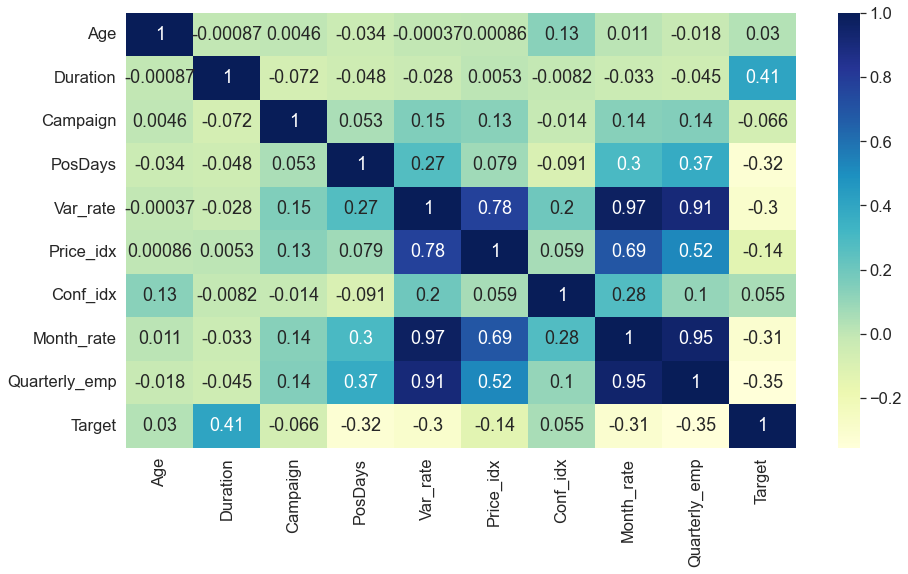

In [71]:
# fig and font size
sns.set(rc = {'figure.figsize':(15, 8)})
sns.set(font_scale = 1.5)

sns.heatmap(_corr, cmap="YlGnBu", annot=True)

RFE

In [95]:
# Recursive feature elimination (RFE):
# [1] Create a new DataFrame.
data_final_vars=df_final.columns.values.tolist()

# [2a] Set the dependent variable.
y=['Target']  
# [2b] Set the independent variable.
X=[i for i in data_final_vars if i not in y]  

# [3] Import two packages from sklearn:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# [4] Indicate ‘logreg’ equals ‘LogisticRegression()’. 
logreg = LogisticRegression()

# [5] Specify ‘rfe’ value and no. of features.
# Here are two options for rfe. See which one works for you.
rfe = RFE(logreg) 

# [6] Indicate the fit with ‘fit()’.
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())  

# [7] Print the two rfes:


print(rfe.support_)
print(rfe.ranking_) 


[False False False False False False False False False False  True  True
 False  True False False  True False False False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
  True  True  True  True  True  True  True False]
[24 26 25 27 20 19 22 18 23  5  1  1  6  1  8  4  1  7  3  2  1  1  1  1
 28  1  1  1  1  1  1  1  1  1  1  1  1  1 14 10 29 11 13 21 12  9 17 16
  1  1  1  1  1  1  1 15]


In [73]:
df_final_vars

['Age',
 'Duration',
 'Campaign',
 'PosDays',
 'Var_rate',
 'Price_idx',
 'Conf_idx',
 'Month_rate',
 'Quarterly_emp',
 'Target',
 'Occupation_admin.',
 'Occupation_blue-collar',
 'Occupation_entrepreneur',
 'Occupation_housemaid',
 'Occupation_management',
 'Occupation_retired',
 'Occupation_self-employed',
 'Occupation_services',
 'Occupation_student',
 'Occupation_technician',
 'Occupation_unemployed',
 'Occupation_unknown',
 'Status_divorced',
 'Status_married',
 'Status_single',
 'Status_unknown',
 'Edu_high-school',
 'Edu_other',
 'Edu_pre-school',
 'Edu_professional',
 'Edu_uni',
 'House_no',
 'House_unknown',
 'House_yes',
 'Loan_no',
 'Loan_unknown',
 'Loan_yes',
 'Comm_cellular',
 'Comm_telephone',
 'Month_apr',
 'Month_aug',
 'Month_dec',
 'Month_jul',
 'Month_jun',
 'Month_mar',
 'Month_may',
 'Month_nov',
 'Month_oct',
 'Month_sep',
 'DOW_fri',
 'DOW_mon',
 'DOW_thu',
 'DOW_tue',
 'DOW_wed',
 'Last_out_failure',
 'Last_out_nonexistent',
 'Last_out_success']